In [7]:
import logging
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import joblib
import time
import sys

In [8]:
import os
notebooks_path = os.getcwd()
notebooks_path

'd:\\suraj\\Data Science\\Second Revision\\Case Study Leads Scoring\\Lead Scoring Assignment\\notebooks'

In [9]:
str(Path().resolve().parent)

'D:\\suraj\\Data Science\\Second Revision\\Case Study Leads Scoring\\Lead Scoring Assignment'

In [10]:
import sys
from pathlib import Path

# Add the src directory to the Python path
sys.path.append(str(Path().resolve().parent))

from src.create_folds import create_folds
from src.data_cleaning import drop_columns, impute_missing_values
from src.data_preprocessing import preprocess_data
from src.log_reg_model import train_logistic_regression
from src.model_utils import evaluate_model, load_data

In [11]:
# Step 2: Data Cleaning
data = load_data(Path("../input/train_folds.csv"))
df = drop_columns(data)

all_accuracies = []

for fold in range(5):
    logging.info(f"Processing fold {fold}...")
    
    # Step 3: Data Imputation
    fold_df = impute_missing_values(df, fold)
    
    # Step 4: Data Preprocessing
    fold_df = preprocess_data(fold_df, fold)
    
    # Step 5: Model Training
    X = fold_df.drop(["Converted", "kfold"], axis=1)
    y = fold_df["Converted"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = train_logistic_regression(X_train, y_train)["model"]
    
    # Step 6: Model Evaluation
    accuracy, report, matrix = evaluate_model(model, X_test, y_test)
    all_accuracies.append(accuracy)
    
    # Print results
    print(f"Fold {fold} Results:")
    print(f"Accuracy: {accuracy}")
    # print(f"Classification Report:\n{report}")
    # print(f"Confusion Matrix:\n{matrix}")

INFO:evaluation.log:==================================================
INFO:evaluation.log:Loading Data
INFO:evaluation.log:==================================================
INFO:evaluation.log:Loading data from ..\input\train_folds.csv
INFO:evaluation.log:Data loaded successfully with shape: (9240, 38)
INFO:data_cleaning.log:Dropping irrelevant columns...
INFO:data_cleaning.log:Dropped irrelevant columns. Shape before: (9240, 38), after: (9240, 36)
INFO:data_cleaning.log:Replaced 'Select' values with NaN.
INFO:data_cleaning.log:Dropped columns with more than 25.0% missing values. Current shape: (9240, 23)
INFO:data_cleaning.log:Dropped columns with single unique values: ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']. Current shape: (9240, 18)
INFO:data_cleaning.log:Starting data imputation for fold 0...
INFO:data_cleaning.log:Train shape: (7392, 18), Test shape: (1848

Fold 0 Results:
Accuracy: 0.797077922077922


INFO:evaluation.log:  - Accuracy: 0.8052
INFO:evaluation.log:  - Precision: 0.7699
INFO:evaluation.log:  - Recall: 0.6778
INFO:evaluation.log:  - F1 Score: 0.7209
INFO:evaluation.log:  - ROC AUC: 0.8613
INFO:evaluation.log:  - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1162
           1       0.77      0.68      0.72       686

    accuracy                           0.81      1848
   macro avg       0.80      0.78      0.79      1848
weighted avg       0.80      0.81      0.80      1848

INFO:evaluation.log:  - Confusion Matrix:
    [1023  139]
    [221 465]
INFO:evaluation.log:==================================================
INFO:evaluation.log:Model Evaluation Completed
INFO:data_cleaning.log:Starting data imputation for fold 2...
INFO:data_cleaning.log:Train shape: (7392, 18), Test shape: (1848, 18)
INFO:data_cleaning.log:Imputed missing values with most frequent values.
INFO:data_cleaning.log:Data

Fold 1 Results:
Accuracy: 0.8051948051948052


INFO:evaluation.log:  - Accuracy: 0.7998
INFO:evaluation.log:  - Precision: 0.7792
INFO:evaluation.log:  - Recall: 0.6823
INFO:evaluation.log:  - F1 Score: 0.7275
INFO:evaluation.log:  - ROC AUC: 0.8754
INFO:evaluation.log:  - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1124
           1       0.78      0.68      0.73       724

    accuracy                           0.80      1848
   macro avg       0.79      0.78      0.78      1848
weighted avg       0.80      0.80      0.80      1848

INFO:evaluation.log:  - Confusion Matrix:
    [984 140]
    [230 494]
INFO:evaluation.log:==================================================
INFO:evaluation.log:Model Evaluation Completed
INFO:data_cleaning.log:Starting data imputation for fold 3...
INFO:data_cleaning.log:Train shape: (7392, 18), Test shape: (1848, 18)
INFO:data_cleaning.log:Imputed missing values with most frequent values.
INFO:data_cleaning.log:Data i

Fold 2 Results:
Accuracy: 0.7997835497835498


INFO:evaluation.log:Model Evaluation Completed
INFO:data_cleaning.log:Starting data imputation for fold 4...
INFO:data_cleaning.log:Train shape: (7392, 18), Test shape: (1848, 18)
INFO:data_cleaning.log:Imputed missing values with most frequent values.
INFO:data_cleaning.log:Data imputation completed for fold 4. Combined shape: (9240, 18)
INFO:data_preprocessing.log:Starting preprocessing of data for fold 4...
INFO:data_preprocessing.log:Binary columns mapped: ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']. Data shape: (9240, 18)
INFO:data_preprocessing.log:Numerical columns converted: ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'kfold']. Data shape: (9240, 18)
INFO:data_preprocessing.log:Split data into train and test. Train shape: (7392, 18), Test shape: (1848, 18)
INFO:data_preprocessing.log:Categoric

Fold 3 Results:
Accuracy: 0.795995670995671


INFO:model_building.log:Logistic regression training completed.
INFO:model_building.log:Attempting to save model to: ./models/log_reg_fold_0.pkl
INFO:model_building.log:Model successfully saved to ./models/log_reg_fold_0.pkl
INFO:model_building.log:Model saved to ./models/log_reg_fold_0.pkl.
INFO:evaluation.log:==================================================
INFO:evaluation.log:Starting Model Evaluation
INFO:evaluation.log:==================================================
INFO:evaluation.log:Using custom threshold: 0.50
INFO:evaluation.log:Model Evaluation Metrics:
INFO:evaluation.log:  - Accuracy: 0.7960
INFO:evaluation.log:  - Precision: 0.7911
INFO:evaluation.log:  - Recall: 0.6812
INFO:evaluation.log:  - F1 Score: 0.7321
INFO:evaluation.log:  - ROC AUC: 0.8786
INFO:evaluation.log:  - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1092
           1       0.79      0.68      0.73       756

    accura

Fold 4 Results:
Accuracy: 0.795995670995671


In [12]:
fold = 0
logging.info(f"Processing fold {fold}...")

# Step 3: Data Imputation
fold_df = impute_missing_values(df, fold)

# Step 4: Data Preprocessing
fold_df = preprocess_data(fold_df, fold)

# Step 5: Model Training
X = fold_df.drop(["Converted", "kfold"], axis=1)
y = fold_df["Converted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = train_logistic_regression(X_train, y_train)["model"]

# Step 6: Model Evaluation
accuracy, report, matrix = evaluate_model(model, X_test, y_test)

# Print results
print(f"Fold {fold} Results:")
print(f"Accuracy: {accuracy}")
# print(f"Classification Report:\n{report}")
# print(f"Confusion Matrix:\n{matrix}")



INFO:data_cleaning.log:Starting data imputation for fold 0...
INFO:data_cleaning.log:Train shape: (7392, 18), Test shape: (1848, 18)
INFO:data_cleaning.log:Imputed missing values with most frequent values.
INFO:data_cleaning.log:Data imputation completed for fold 0. Combined shape: (9240, 18)
INFO:data_preprocessing.log:Starting preprocessing of data for fold 0...
INFO:data_preprocessing.log:Binary columns mapped: ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']. Data shape: (9240, 18)
INFO:data_preprocessing.log:Numerical columns converted: ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'kfold']. Data shape: (9240, 18)
INFO:data_preprocessing.log:Split data into train and test. Train shape: (7392, 18), Test shape: (1848, 18)
INFO:data_preprocessing.log:Categorical columns encoded: ['Lead Origin', 'Lead Sourc

Fold 0 Results:
Accuracy: 0.797077922077922


## Coefficients

In [13]:
# Calculate feature importance

coefficients = model.coef_[0]
# odds_ratios = [round(float(x), 2) for x in list(map(lambda x: 2**x, coefficients))]
odds_ratios = np.exp(coefficients)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

# Sort by absolute value of coefficient
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)
print(feature_importance)

                                     Feature  Coefficient  Odds Ratio
13                 Lead Origin_Lead Add Form     2.774608   16.032345
29              Lead Source_Welingak Website     2.009476    7.459405
64         Last Notable Activity_Unreachable     1.451245    4.268427
0                               Do Not Email    -1.229384    0.292473
44     Last Activity_Olark Chat Conversation    -1.205961    0.299404
..                                       ...          ...         ...
11    A free copy of Mastering The Interview     0.078097    1.081227
51  Last Activity_Visited Booth in Tradeshow    -0.071122    0.931348
65        Last Notable Activity_Unsubscribed     0.026582    1.026939
30                          Lead Source_bing     0.001904    1.001906
15                Lead Origin_Quick Add Form     0.000000    1.000000

[67 rows x 3 columns]


## Model Probabilities

In [14]:
# Get probability of conversion
probs = model.predict_proba(X_test)[:, 1] # Probability of the positive class

In [15]:
# Apply a custom threshold to get the predicted class
threshold = 0.45
y_pred = (probs >= threshold).astype(int)

# Evaluate the model with the custom threshold
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with threshold {threshold}: {accuracy}")

Accuracy with threshold 0.45: 0.7992424242424242


## Plotting the ROC Curve and Calculating AUC

In [16]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calculate AUC
auc_score = roc_auc_score(y_test, probs)
print(f"AUC: {auc_score}")

AUC: 0.86150616668743


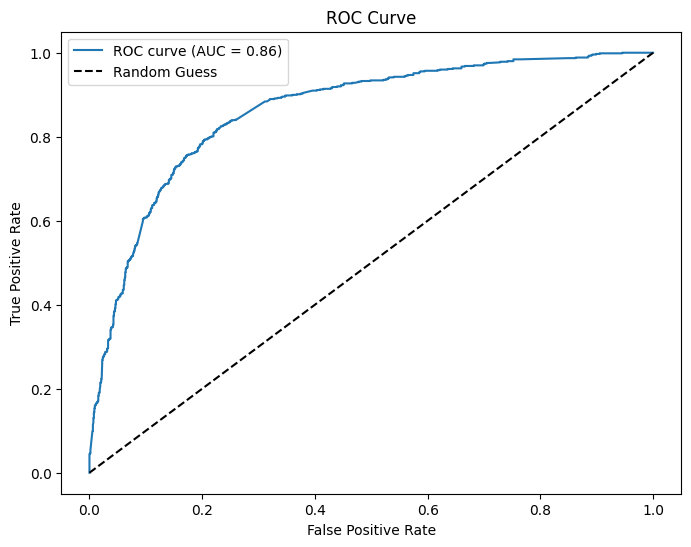

In [17]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Finding Optimal Cut-off Point

Optimal cut-off point is the point where we get the best accuracy. We can find it by calculating the point where the sum of sensitivity and specificity is maximum.

Best F1-Score threshold: 0.32, Best F1-Score: 0.74609375
Best Accuracy threshold: 0.47000000000000003, Best Accuracy: 0.801948051948052
Best Precision threshold: 0.99, Best Precision: 1.0
Best Recall threshold: 0.0, Best Recall: 1.0
Best threshold: 0.5


<Figure size 800x600 with 0 Axes>

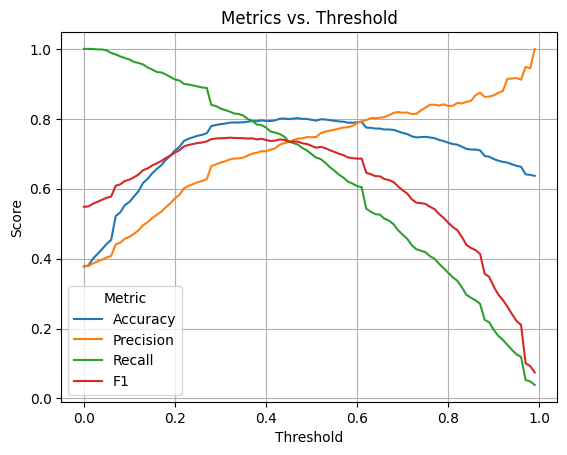

In [18]:
# Let's create columns with different probability thresholds
thresholds = np.linspace(0, 0.99, 100)
metrics = []
best_threshold = 0.5
best_f1, best_accuracy, best_precision, best_recall = 0, 0, 0, 0
best_f1_threshold, best_accuracy_threshold, best_precision_threshold, best_recall_threshold = 0, 0, 0, 0

for threshold in thresholds:
    y_pred = (probs >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics.append([threshold, accuracy, precision, recall, f1])
    if f1 > best_f1:
        best_f1 = f1
        best_f1_threshold = threshold
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_accuracy_threshold = threshold
    if precision > best_precision:
        best_precision = precision
        best_precision_threshold = threshold
    if recall > best_recall:
        best_recall = recall
        best_recall_threshold = threshold
    if recall == precision:
        best_threshold = threshold

metrics_df = pd.DataFrame(metrics, columns=["Threshold", "Accuracy", "Precision", "Recall", "F1"])
metrics_df = metrics_df.set_index("Threshold")

print(f"Best F1-Score threshold: {best_f1_threshold}, Best F1-Score: {best_f1}")
print(f"Best Accuracy threshold: {best_accuracy_threshold}, Best Accuracy: {best_accuracy}")
print(f"Best Precision threshold: {best_precision_threshold}, Best Precision: {best_precision}")
print(f"Best Recall threshold: {best_recall_threshold}, Best Recall: {best_recall}")
print(f"Best threshold: {best_threshold}")

# Plot the metrics
plt.figure(figsize=(8, 6))
metrics_df.plot()
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Metrics vs. Threshold")
plt.legend(title="Metric")
plt.grid(True)
plt.show()

## Youden's Index

Youden's Index ia a statistic that is often used to evaluate the effectiveness of a diagnostic test or, in the context of machine learning, to assess the performance of a binary classification model. It helps to identify the optimal threshold that maximized the balance between the true positive rate (sensitivity) and the false positive rate (1-specificity).

In [19]:
def find_optimal_threshold(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    youdens_index = tpr - fpr
    optimal_threshold = thresholds[np.argmax(youdens_index)]
    return optimal_threshold

youden_threshold = find_optimal_threshold(y_test, probs)
print(f"Optimal threshold: {youden_threshold}")

Optimal threshold: 0.3170444651711455


## Precision-Recall Curve

In [20]:
# Precision-Recall Curve
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 1.0
Recall: 0.03868194842406877
F1 Score: 0.07448275862068965


Average Precision Score: 0.78


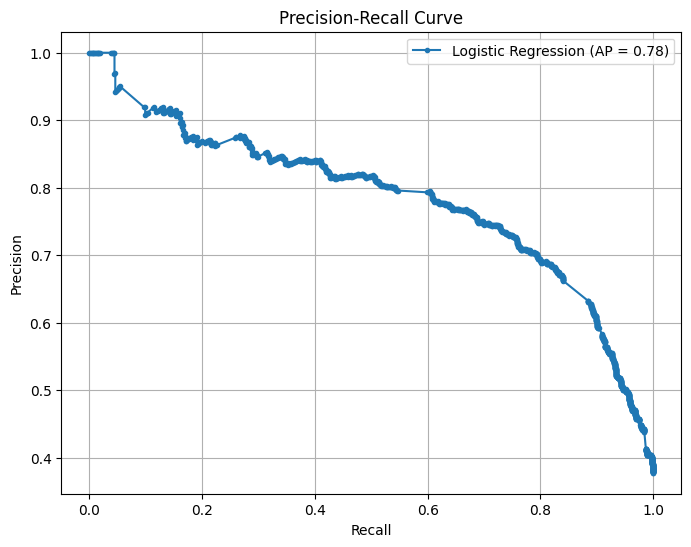

In [21]:
# Step 2: Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Step 3: Calculate the average precision score
average_precision = average_precision_score(y_test, probs)
print(f'Average Precision Score: {average_precision:.2f}')

# Step 4: Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Logistic Regression (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Best F1-Score threshold: 0.31513513513513514, Best F1-Score: 0.7470817120622568
Best Accuracy threshold: 0.4637837837837838, Best Accuracy: 0.8024891774891775
Best Precision threshold: 0.9840540540540541, Best Precision: 1.0
Best Recall threshold: 0.0, Best Recall: 1.0
Best threshold (Recall ≈ Precision): 0.45981981981981984


<Figure size 1500x1000 with 0 Axes>

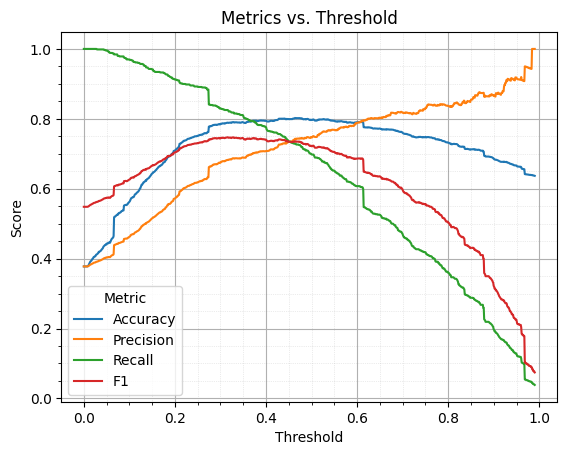

In [22]:
def evaluate_thresholds(probs, y_test, thresholds=np.linspace(0, 0.99, 1000), tol=0.01):
    metrics = []
    best_f1, best_accuracy, best_precision, best_recall = 0, 0, 0, 0
    best_f1_threshold, best_accuracy_threshold, best_precision_threshold, best_recall_threshold = 0, 0, 0, 0
    best_threshold = 0.1

    for threshold in thresholds:
        y_pred = (probs >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        metrics.append([threshold, accuracy, precision, recall, f1])
        
        if f1 > best_f1:
            best_f1 = f1
            best_f1_threshold = threshold
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_accuracy_threshold = threshold
        if precision > best_precision:
            best_precision = precision
            best_precision_threshold = threshold
        if recall > best_recall:
            best_recall = recall
            best_recall_threshold = threshold
        if abs(recall - precision) <= tol:  # Compare within the tolerance
            best_threshold = threshold

    metrics_df = pd.DataFrame(metrics, columns=["Threshold", "Accuracy", "Precision", "Recall", "F1"])
    metrics_df = metrics_df.set_index("Threshold")

    print(f"Best F1-Score threshold: {best_f1_threshold}, Best F1-Score: {best_f1}")
    print(f"Best Accuracy threshold: {best_accuracy_threshold}, Best Accuracy: {best_accuracy}")
    print(f"Best Precision threshold: {best_precision_threshold}, Best Precision: {best_precision}")
    print(f"Best Recall threshold: {best_recall_threshold}, Best Recall: {best_recall}")
    print(f"Best threshold (Recall ≈ Precision): {best_threshold}")

    return metrics_df, best_f1_threshold, best_accuracy_threshold, best_precision_threshold, best_recall_threshold, best_threshold


def plot_metrics(metrics_df):
    plt.figure(figsize=(15, 10))
    metrics_df.plot()
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Metrics vs. Threshold")
    plt.legend(title="Metric")
    plt.grid(True, which='both')
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray', alpha=0.3)

    plt.show()

# Example usage:
probs = model.predict_proba(X_test)[:, 1]
metrics_df, best_f1_threshold, best_accuracy_threshold, best_precision_threshold, best_recall_threshold, best_threshold = evaluate_thresholds(probs, y_test)
plot_metrics(metrics_df)


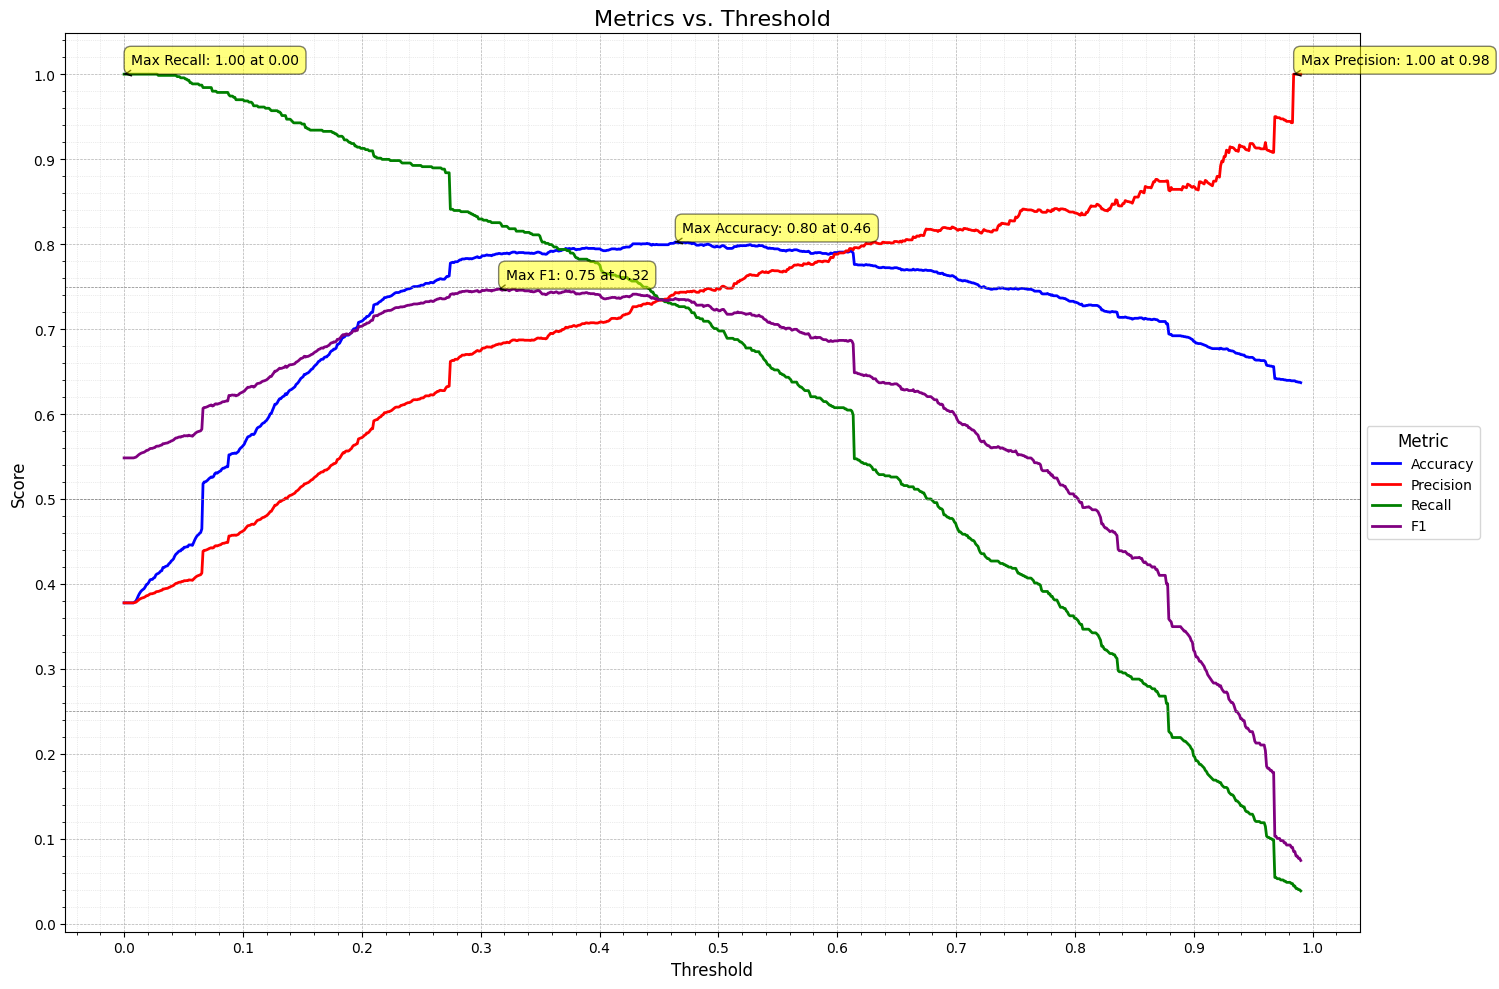

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics(metrics_df, figsize=(15, 10), title="Metrics vs. Threshold", 
                 custom_colors=None, save_path=None):
    """
    Plot metrics against thresholds with improved formatting and options.
    
    Parameters:
    - metrics_df: DataFrame with metrics (columns) and thresholds (index)
    - figsize: Tuple for figure size
    - title: String for plot title
    - custom_colors: Dict mapping metric names to colors (optional)
    - save_path: String path to save the figure (optional)
    """
    plt.figure(figsize=figsize)
    
    # Use custom colors if provided, otherwise use default color cycle
    if custom_colors:
        for column, color in custom_colors.items():
            plt.plot(metrics_df.index, metrics_df[column], label=column, color=color, linewidth=2)
    else:
        for column in metrics_df.columns:
            plt.plot(metrics_df.index, metrics_df[column], label=column, linewidth=2)
    
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.title(title, fontsize=16)
    plt.legend(title="Metric", title_fontsize=12, fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Set x-axis ticks
    plt.xticks(np.arange(0, 1.1, 0.1))
    
    # Set y-axis ticks
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    # Add grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray', alpha=0.3)
    
    # Add horizontal lines at 0.25, 0.5, and 0.75 for easier reading
    for y in [0.25, 0.5, 0.75]:
        plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)
    
    # Improve layout
    plt.tight_layout()
    
    # Add text annotations for max values
    for column in metrics_df.columns:
        max_value = metrics_df[column].max()
        max_threshold = metrics_df[column].idxmax()
        plt.annotate(f'Max {column}: {max_value:.2f} at {max_threshold:.2f}',
                     xy=(max_threshold, max_value), xytext=(5, 5),
                     textcoords='offset points', ha='left', va='bottom',
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    # Save the figure if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

# Example usage:
custom_colors = {'Accuracy': 'blue', 'Precision': 'red', 'Recall': 'green', 'F1': 'purple'}
plot_metrics(metrics_df, custom_colors=custom_colors)
# plot_metrics(metrics_df, custom_colors=custom_colors, save_path='metrics_plot.png')

## Metrics based on the best threshold

In [24]:
# Set the chosen threshold
chosen_threshold = 0.46

# Apply the threshold to get predictions
y_pred = (probs >= chosen_threshold).astype(int)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, probs)

# Print the results
print(f"Metrics at Threshold {chosen_threshold}:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC: {auc_score}")

Metrics at Threshold 0.46:
Accuracy: 0.8008658008658008
Precision: 0.7391304347826086
Recall: 0.7306590257879656
F1-Score: 0.7348703170028819
AUC: 0.86150616668743


In [25]:
thresholds = np.linspace(0.30, 0.64, 17)
thresholds

array([0.3    , 0.32125, 0.3425 , 0.36375, 0.385  , 0.40625, 0.4275 ,
       0.44875, 0.47   , 0.49125, 0.5125 , 0.53375, 0.555  , 0.57625,
       0.5975 , 0.61875, 0.64   ])

In [26]:
# List of thresholds to evaluate
thresholds = np.linspace(0.30, 0.64, 34)

for chosen_threshold in thresholds:
    # Apply the threshold to get predictions
    y_pred = (probs >= chosen_threshold).astype(int)

    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, probs)

    print(f"Threshold {chosen_threshold:.2f}: Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, AUC: {auc_score:.2f}")

Threshold 0.30: Accuracy: 0.78, Precision: 0.67, Recall: 0.83, F1-Score: 0.74, AUC: 0.86
Threshold 0.31: Accuracy: 0.79, Precision: 0.68, Recall: 0.83, F1-Score: 0.75, AUC: 0.86
Threshold 0.32: Accuracy: 0.79, Precision: 0.68, Recall: 0.82, F1-Score: 0.75, AUC: 0.86
Threshold 0.33: Accuracy: 0.79, Precision: 0.69, Recall: 0.82, F1-Score: 0.75, AUC: 0.86
Threshold 0.34: Accuracy: 0.79, Precision: 0.69, Recall: 0.81, F1-Score: 0.74, AUC: 0.86
Threshold 0.35: Accuracy: 0.79, Precision: 0.69, Recall: 0.80, F1-Score: 0.74, AUC: 0.86
Threshold 0.36: Accuracy: 0.79, Precision: 0.70, Recall: 0.80, F1-Score: 0.74, AUC: 0.86
Threshold 0.37: Accuracy: 0.79, Precision: 0.70, Recall: 0.79, F1-Score: 0.74, AUC: 0.86
Threshold 0.38: Accuracy: 0.79, Precision: 0.70, Recall: 0.78, F1-Score: 0.74, AUC: 0.86
Threshold 0.39: Accuracy: 0.79, Precision: 0.71, Recall: 0.78, F1-Score: 0.74, AUC: 0.86
Threshold 0.40: Accuracy: 0.79, Precision: 0.71, Recall: 0.77, F1-Score: 0.74, AUC: 0.86
Threshold 0.41: Accur

Considering the business requirement, where CEO has given a ballpark of the target lead conversion rate to be around 80%, we need precision atleast 80% to consider the model to be good. 

At the threshold of 0.62, we start getting precision of 80%. So, we will consider this threshold as the best threshold for our model.
It's because after this threshold, even though the precision is increasing, the recall and F1 score are decreasing. So, we will consider the threshold of 0.62 as the best threshold for our model.

## Metrics of all folds

In [28]:
fold = 0

logging.info(f"Processing fold {fold}...")

# Step 3: Data Imputation
fold_df = impute_missing_values(df, fold)

# Step 4: Data Preprocessing
fold_df = preprocess_data(fold_df, fold)

# Step 5: Model Training
X = fold_df.drop(["Converted", "kfold"], axis=1)
y = fold_df["Converted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = train_logistic_regression(X_train, y_train)["model"]
# Predict probabilities
probs = model.predict_proba(X_test)[:, 1]

# Evaluate the model with the custom threshold
threshold = 0.62
y_pred = (probs >= threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, probs)

# Print results
print(f"Fold {fold} Results: Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, AUC: {auc_score:.2f}")
print()  

INFO:data_cleaning.log:Starting data imputation for fold 0...
INFO:data_cleaning.log:Train shape: (7392, 18), Test shape: (1848, 18)
INFO:data_cleaning.log:Imputed missing values with most frequent values.
INFO:data_cleaning.log:Data imputation completed for fold 0. Combined shape: (9240, 18)
INFO:data_preprocessing.log:Starting preprocessing of data for fold 0...
INFO:data_preprocessing.log:Binary columns mapped: ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']. Data shape: (9240, 18)
INFO:data_preprocessing.log:Numerical columns converted: ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'kfold']. Data shape: (9240, 18)
INFO:data_preprocessing.log:Split data into train and test. Train shape: (7392, 18), Test shape: (1848, 18)
INFO:data_preprocessing.log:Categorical columns encoded: ['Lead Origin', 'Lead Sourc

Fold 0 Results: Accuracy: 0.77, Precision: 0.80, Recall: 0.54, F1 Score: 0.65, AUC: 0.86



## Feature Importance

In [29]:
# Extract feature importance for fold 0
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

# Sort by absolute value of coefficient
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)
print(feature_importance)

                                     Feature  Coefficient  Odds Ratio
13                 Lead Origin_Lead Add Form     2.774608   16.032345
29              Lead Source_Welingak Website     2.009476    7.459405
64         Last Notable Activity_Unreachable     1.451245    4.268427
0                               Do Not Email    -1.229384    0.292473
44     Last Activity_Olark Chat Conversation    -1.205961    0.299404
..                                       ...          ...         ...
11    A free copy of Mastering The Interview     0.078097    1.081227
51  Last Activity_Visited Booth in Tradeshow    -0.071122    0.931348
65        Last Notable Activity_Unsubscribed     0.026582    1.026939
30                          Lead Source_bing     0.001904    1.001906
15                Lead Origin_Quick Add Form     0.000000    1.000000

[67 rows x 3 columns]


In [30]:
# Extract feature importance
feature_importance = pd.Series(model.coef_[0], index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(f"Feature importance:\n{feature_importance}")

Feature importance:
Lead Origin_Lead Add Form                         2.774608
Lead Source_Welingak Website                      2.009476
Last Notable Activity_Unreachable                 1.451245
Total Time Spent on Website                       1.121709
Last Notable Activity_Had a Phone Conversation    1.016420
                                                    ...   
Last Activity_Email Bounced                      -0.927297
Last Notable Activity_Email Link Clicked         -0.934943
Last Notable Activity_Modified                   -1.054580
Last Activity_Olark Chat Conversation            -1.205961
Do Not Email                                     -1.229384
Length: 67, dtype: float64


INFO:data_cleaning.log:Starting data imputation for fold 0...
INFO:data_cleaning.log:Train shape: (7392, 18), Test shape: (1848, 18)
INFO:data_cleaning.log:Imputed missing values with most frequent values.
INFO:data_cleaning.log:Data imputation completed for fold 0. Combined shape: (9240, 18)
INFO:data_preprocessing.log:Starting preprocessing of data for fold 0...
INFO:data_preprocessing.log:Binary columns mapped: ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']. Data shape: (9240, 18)
INFO:data_preprocessing.log:Numerical columns converted: ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'kfold']. Data shape: (9240, 18)
INFO:data_preprocessing.log:Split data into train and test. Train shape: (7392, 18), Test shape: (1848, 18)
INFO:data_preprocessing.log:Categorical columns encoded: ['Lead Origin', 'Lead Sourc

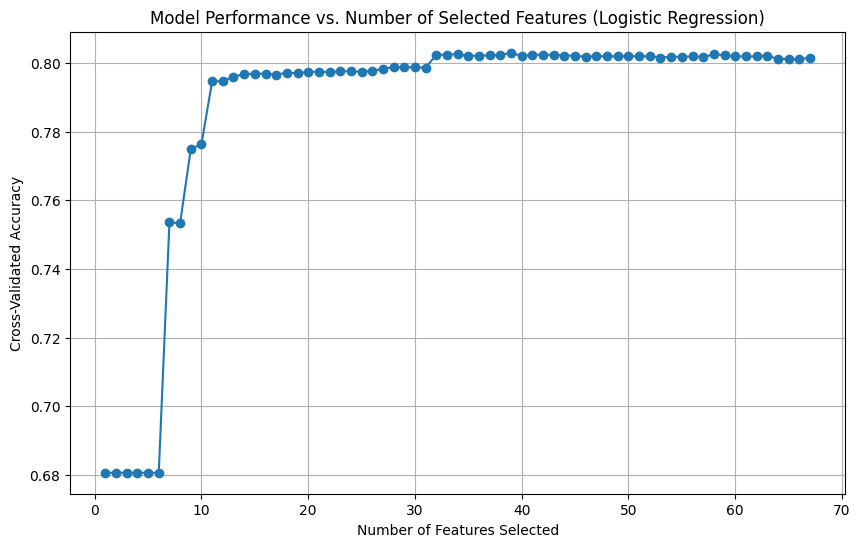

In [34]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

fold = 0

# Step 3: Data Imputation
fold_df = impute_missing_values(df, fold)

# Step 4: Data Preprocessing
fold_df = preprocess_data(fold_df, fold)

# Assuming X and y are your features and target
X = fold_df.drop(["Converted", "kfold"], axis=1)
y = fold_df["Converted"]

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Arrays to store results
scores = []
n_features_list = range(1, X.shape[1] + 1)

# Perform RFE and cross-validation
for n_features in n_features_list:
    rfe = RFE(model, n_features_to_select=n_features)
    X_rfe = rfe.fit_transform(X, y)
    score = cross_val_score(model, X_rfe, y, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_features_list, scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Model Performance vs. Number of Selected Features (Logistic Regression)')
plt.grid(True)
plt.show()


INFO:data_cleaning.log:Starting data imputation for fold 0...
INFO:data_cleaning.log:Train shape: (7392, 18), Test shape: (1848, 18)
INFO:data_cleaning.log:Imputed missing values with most frequent values.
INFO:data_cleaning.log:Data imputation completed for fold 0. Combined shape: (9240, 18)
INFO:data_preprocessing.log:Starting preprocessing of data for fold 0...
INFO:data_preprocessing.log:Binary columns mapped: ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']. Data shape: (9240, 18)
INFO:data_preprocessing.log:Numerical columns converted: ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'kfold']. Data shape: (9240, 18)
INFO:data_preprocessing.log:Split data into train and test. Train shape: (7392, 18), Test shape: (1848, 18)
INFO:data_preprocessing.log:Categorical columns encoded: ['Lead Origin', 'Lead Sourc

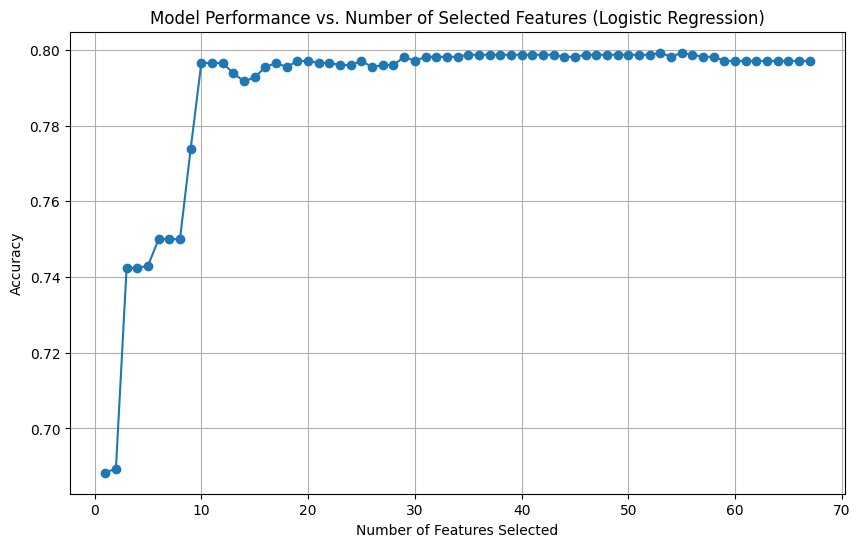

In [33]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

fold = 0

logging.info(f"Processing fold {fold}...")

# Step 3: Data Imputation
fold_df = impute_missing_values(df, fold)

# Step 4: Data Preprocessing
fold_df = preprocess_data(fold_df, fold)

# Assuming X and y are your features and target
X = fold_df.drop(["Converted", "kfold"], axis=1)
y = fold_df["Converted"]

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Arrays to store results
scores = []
n_features_list = range(1, X_train.shape[1] + 1)

# Perform RFE
for n_features in n_features_list:
    rfe = RFE(model, n_features_to_select=n_features)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)  # Apply the same transformation to the test set

    # Fit the model on the training data
    model.fit(X_train_rfe, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test_rfe)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_features_list, scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Model Performance vs. Number of Selected Features (Logistic Regression)')
plt.grid(True)
plt.show()
